In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import yroots as yr
import Optimal_QR as O_QR
from scipy.special import comb
from scipy.linalg import qr, svd

In [4]:
qrt_raw = np.load('tols_qrt.pkl',allow_pickle=True)
qrt = {qrt_raw[n]['tol_set']:{attr: qrt_raw[n][attr] for attr in list(qrt_raw[n].keys())[1:]} for n in range(63)}
qrt = [pd.DataFrame(qrt[i]) for i in qrt.keys()]
qrt[0]

,max_residuals,residuals,timing,norms,num_roots,cond,backcond,cond_eig,gradient_info,intervals,root_vols
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.324776e-09,"([4.3470782529198004e-11, -1.2787741629494143e...",0.446987,"[[-3.978549739658277e-09, -8.463412276560334e-...",5.0,4.906055,4.906055,"[1.3747242164174467, 1.3747242164174467, 1.415...","[[[(-0.0030339220943746575+0j), (0.00220654103...",307.0,"[1.2124437093385169e-05, 1.7910280940863116e-0..."
4,0.000000e+00,"([0.0], [0.0])",0.041559,"[[0.0, 0.0]]",1.0,0.000000,0.000000,"[nan, nan]","[[[(1+0j), (-1+0j)], [(1+0j), (1+0j)]]]",1.0,[4.0]
5,8.326673e-17,"([-8.326672684688674e-17], [0.0])",0.042475,"[[1.1102230246251565e-16, 4.996003610813204e-16]]",1.0,0.000000,0.000000,"[nan, nan]","[[[(0.5+0j), (1+0j)], [(-2.0999999999999996+0j...",1.0,[4.0]
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.881784e-16,"([-3.261523556010988e-18, 3.2643798584108762e-...",0.044669,"[[3.261523556010988e-18, 2.1557408635963782e-1...",2.0,3.236068,3.236068,"[6.029025798987393, 6.029025798987393, 6.02902...","[[[(0.9999999999999998+0j), 0j], [(-1.9998+0j)...",1.0,"[4.0, 4.0]"
8,1.953192e-09,"([-1.354621855727241e-10, -9.708888103879002e-...",11.063271,"[[-1.3261003406483951e-11, -5.634304134360946e...",5.0,0.000000,0.000000,"[nan, nan, nan, nan, nan, nan]","[[[(-0.0018913504847937095+0j), (-0.0001891349...",16429.0,"[8.943028460926976e-07, 9.99761190436421e-07, ..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
correct_num_roots = np.array([4, 13, 5, 1, 1, 6, 2, 5, 93, 103, 4, 45, 5, 2, 10, 5, 6, 4, 4, 10, 2, 49, 8, 39, 4, 2, 17])
missing_list = []
missing_idx = []
for i,dic in enumerate(qrt):
    #remove things that are missing too many roots
    isna_mask = dic['num_roots'].isna()
    dic['roots_missing'] = np.abs(dic['num_roots'][~isna_mask] - correct_num_roots[~isna_mask])
    missing = np.sum(dic['roots_missing'])
    missing_list.append(missing)
    if missing > 5:
        missing_idx.append(i)
    #residuals
    dic['log10_mean_res'] = [np.log10(np.abs(dic['residuals'].iloc[i])).mean() for i in range(27)]
    dic['log10_max_res'] = [np.log10(np.abs(dic['residuals'].iloc[i])).max() for i in range(27)]
    #horizontal difference
    dic['log10_mean_norms'] = [np.log10(np.abs(dic['norms'].iloc[i])).mean() for i in range(27)]
    dic['log10_max_norms'] = [np.log10(np.abs(dic['norms'].iloc[i])).max() for i in range(27)]

/Users/SuzannaStephensonAdmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/SuzannaStephensonAdmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/SuzannaStephensonAdmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/SuzannaStephensonAdmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


In [8]:
missing_dict = {}
for i in missing_idx:
    print(qrt_raw[i]['tol_set'],missing_list[i])
    label = (qrt_raw[i]['tol_set'],missing_list[i])
    missing_dict[label] = qrt[i]['roots_missing']
missing_df = pd.DataFrame(missing_dict)

(1e-08, 1e-08, 1e-10, 100000, 1e-05, 100, 9) 38.0
(1e-08, 1e-12, 1e-10, 100000, 1e-05, 100, 9) 49.0
(1e-08, 1e-15, 1e-10, 100000, 1e-05, 100, 9) 49.0
(1e-12, 1e-08, 1e-10, 100000, 1e-05, 100, 9) 41.0
(1e-12, 1e-12, 1e-10, 100000, 1e-05, 100, 9) 46.0
(1e-12, 1e-12, 1e-10, 100000, 1e-05, 100, 12) 42.0
(1e-12, 1e-12, 1e-10, 100000, 1e-05, 100, 16) 40.0
(1e-15, 1e-08, 1e-10, 100000, 1e-05, 100, 9) 61.0
(1e-15, 1e-08, 1e-10, 100000, 1e-05, 100, 12) 17.0
(1e-15, 1e-08, 1e-10, 100000, 1e-05, 100, 16) 6.0
(1e-15, 1e-12, 1e-10, 100000, 1e-05, 100, 9) 45.0
(1e-15, 1e-12, 1e-10, 100000, 1e-05, 100, 12) 50.0
(1e-15, 1e-12, 1e-10, 100000, 1e-05, 100, 16) 40.0


In [13]:
pd.set_option('display.max_columns', None)
missing_df.T

,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
"(1e-08, 1e-08, 1e-10, 100000, 1e-05, 100, 9)",38.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,NaN,4.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,3.0,0.0,0.0,0.0
"(1e-08, 1e-12, 1e-10, 100000, 1e-05, 100, 9)",49.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,NaN,12.0,0.0,NaN,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,6.0,0.0,0.0,0.0
"(1e-08, 1e-15, 1e-10, 100000, 1e-05, 100, 9)",49.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,NaN,12.0,0.0,NaN,3.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,6.0,0.0,0.0,0.0
"(1e-12, 1e-08, 1e-10, 100000, 1e-05, 100, 9)",41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,6.0,0.0,1.0,1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,0.0,0.0
"(1e-12, 1e-12, 1e-10, 100000, 1e-05, 100, 9)",46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,25.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,3.0,0.0,0.0,0.0
"(1e-12, 1e-12, 1e-10, 100000, 1e-05, 100, 12)",42.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,26.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0
"(1e-12, 1e-12, 1e-10, 100000, 1e-05, 100, 16)",40.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,25.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0
"(1e-15, 1e-08, 1e-10, 100000, 1e-05, 100, 9)",61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,20.0,6.0,0.0,1.0,1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,0.0,0.0
"(1e-15, 1e-08, 1e-10, 100000, 1e-05, 100, 12)",17.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,12.0,0.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0
"(1e-15, 1e-08, 1e-10, 100000, 1e-05, 100, 16)",6.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,NaN,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0


In [16]:
missing_df.sum(axis=1)

1       0.0
2      20.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8      26.0
9      37.0
10     52.0
11      0.0
12    158.0
13     12.0
14      0.0
15     14.0
16     13.0
17      0.0
18      0.0
19      0.0
20      1.0
21      0.0
22    156.0
23      5.0
24     30.0
25      0.0
26      0.0
27      0.0
dtype: float64

3
5
9
12
16
20
25


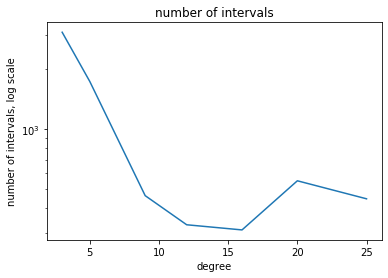

Text(0, 0.5, 'condition number, log scale')

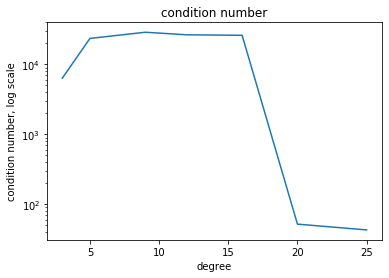

In [45]:
deg_list = [3,5,9,12,16,20,25]
#for intervals
num_intervals = np.array([q.intervals.sum() for q in qrt])
num_tests = np.array([27 - q.intervals.isna().sum() for q in qrt])
#condtion numbers
num_cond = np.array([27 - q.cond.isna().sum() for q in qrt])
cond = np.array([q.cond.sum() for q in qrt])
#degree masks
deg_mask = {deg:np.array([qrt_raw[i]['tol_set'][-1]==deg for i in range(len(qrt_raw))])
            for deg in deg_list}
deg_mask

avg_list_int = []
avg_list_cond = []
for deg in deg_list:
    print(deg)
    #for intervals
    num_int = np.sum(num_intervals[deg_mask[deg]])
    num_test = np.sum(num_tests[deg_mask[deg]])
    avg_list_int.append(num_int/num_test)
    #for condition numbers
    total_cond_calculated = np.sum(num_cond[deg_mask[deg]])
    sum_condition_numbers = np.sum(cond[deg_mask[deg]])
    avg_list_cond.append(sum_condition_numbers/total_cond_calculated)
#for intervals
plt.semilogy(deg_list,avg_list_int)
plt.title('number of intervals')
plt.xlabel('degree')
plt.ylabel('number of intervals, log scale')
plt.show()
#for condition numbers
plt.clf()
plt.semilogy(deg_list,avg_list_cond)
plt.title('condition number')
plt.xlabel('degree')
plt.ylabel('condition number, log scale')

In [83]:
def show_results(groupby,attr,semilog=False,groups=[3,5,9,12,16,20,25]):
    idx = ['rel','abs','trim_zero','max_cond','good_zeros','good_zeros_factor','deg'].index(groupby)
    colors = ['g','orange','r','k','b','c','m']
    colormap = {g:c for c,g in zip(colors,groups)}
    for i,tolset in enumerate(qrt):
        rel,abs_approx,trim_zero,max_cond,good_zeros,good_zeros_factor,deg = qrt_raw[i]['tol_set']
        group = qrt_raw[i]['tol_set'][idx]
#         if i in missing_idx:
#             #ignore if missing too many roots
#             continue
        if abs_approx != 10**-12:
            continue
        if semilog:
            plt.semilogy(np.arange(27),tolset[attr],marker='.',c=colormap[group],label=group,alpha=.35)
        else:
            plt.plot(np.arange(27),tolset[attr],marker='.',c=colormap[group],label=group,alpha=.35)
    plt.title(attr)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

In [87]:
np.array(['17'])

array(['17'], dtype='<U2')

In [86]:
plt.figure(figsize=(20,15))
groupby = 'deg'
# groups = [10**-i for i in [8,12,15]]
groups=[3,5,9,16,20,25,12]
plt.subplot(321)
show_results(groupby,'log10_mean_res',groups=groups,semilog=False)
plt.subplot(322)
show_results(groupby,'log10_max_res',groups=groups,semilog=False)
plt.subplot(323)
show_results(groupby,'log10_mean_norms',groups=groups,semilog=False)
plt.subplot(324)
show_results(groupby,'log10_max_norms',groups=groups,semilog=False)
plt.subplot(325)
show_results(groupby,'timing',groups=groups,semilog=True)
plt.subplot(326)
show_results(groupby,'intervals',groups=groups,semilog=True)
plt.suptitle(groupby)

Text(0.5, 0.98, 'deg')

Error in callback <function flush_figures at 0x11488a200> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(25,15))
logattrib = ['log10_mean_res','log10_max_res','log10_mean_norms','log10_max_norms',
             'log10_mean_cond_eig','log10_max_cond_eig']
attrib = ['cond','backcond']
for i,attr in enumerate(logattrib):
    plt.subplot(len(logattrib)+len(attrib),2,i+1)
    plt.plot(qrt[attr],marker='.',c='C0',label='qrt'+attr,alpha=.5)
    plt.plot(svd[attr],marker='.',c='C1',label='svd'+attr,alpha=.5)
    plt.plot(tvb[attr],marker='.',c='C2',label='tvb'+attr,alpha=.5)
    plt.title(attr)
    plt.legend()
for attr in attrib:
    i+=1
    plt.subplot(len(logattrib)+len(attrib),2,i+1)
    plt.semilogy(qrt[attr],marker='.',c='C0',label='qrt'+attr,alpha=.5)
    plt.semilogy(svd[attr],marker='.',c='C1',label='svd'+attr,alpha=.5)
    plt.semilogy(tvb[attr],marker='.',c='C2',label='tvb'+attr,alpha=.5)
    plt.title(attr)
    plt.legend()

In [90]:
n = 2
d = 9
N = d**n
cols = np.sum(np.arange(1,d*n+1))
cols-N, cols

(90, 171)

In [91]:
f,g = yr.polynomial.getPoly(d,n,power=True), yr.polynomial.getPoly(d,n,power=True)
M,terms,cut = yr.Multiplication.build_macaulay([f,g], False)
M.shape, terms

((90, 171), array([[17,  0],
        [16,  1],
        [15,  2],
        [14,  3],
        [13,  4],
        [12,  5],
        [11,  6],
        [10,  7],
        [ 9,  8],
        [ 8,  9],
        [ 7, 10],
        [ 6, 11],
        [ 5, 12],
        [ 4, 13],
        [ 3, 14],
        [ 2, 15],
        [ 1, 16],
        [ 0, 17],
        [16,  0],
        [15,  1],
        [14,  2],
        [13,  3],
        [12,  4],
        [11,  5],
        [10,  6],
        [ 9,  7],
        [ 8,  8],
        [ 7,  9],
        [ 6, 10],
        [ 5, 11],
        [ 4, 12],
        [ 3, 13],
        [ 2, 14],
        [ 1, 15],
        [ 0, 16],
        [15,  0],
        [14,  1],
        [13,  2],
        [12,  3],
        [11,  4],
        [10,  5],
        [ 9,  6],
        [ 8,  7],
        [ 7,  8],
        [ 6,  9],
        [ 5, 10],
        [ 4, 11],
        [ 3, 12],
        [ 2, 13],
        [ 1, 14],
        [ 0, 15],
        [14,  0],
        [13,  1],
        [12,  2],
        [11,  3],

In [ ]:
M = np.random.randn(cols-N, cols)

In [93]:
%timeit qr(M[cut:,cut:].T,pivoting=True)[0] #.039 secs

2.1 ms ± 738 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
%timeit svd(M[cut:,cut:])[2].conj().T

3.34 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [95]:
%timeit yr.MacaulayReduce.reduce_macaulay_svd(M,cut)

6.85 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [96]:
%timeit yr.MacaulayReduce.reduce_macaulay_qrt(M,cut)

5.16 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
